<a href="https://colab.research.google.com/github/Roger90Br/Data-Extraction-Cleaning-with-Python/blob/main/Desafio_5_Escola_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1- Leia o arquivo e inspecione os dados**

In [ ]:
import pandas as pd

# Passo 1: Leia o dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)

# Passo 2: Utilize o describe para verificar a distribuição dos dados
description = data.describe()
print("Descrição dos dados:")
print(description)

# Passo 3: Analise o tipo dos dados
data_types = data.dtypes
print("\nTipos de dados:")
print(data_types)


<ipython-input-158-c1c00996ac34>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)


Descrição dos dados:
            Quantity      UnitPrice     CustomerID
count  420898.000000  420898.000000  420898.000000
mean       12.117877       3.455848   15282.158525
std       293.345628      68.177678    1716.526088
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13929.000000
50%         5.000000       1.950000   15149.000000
75%        12.000000       3.750000   16790.000000
max     80995.000000   38970.000000   18287.000000

Tipos de dados:
InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


O aviso "FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future." indica que o argumento `error_bad_lines` utilizado na função `pd.read_csv()` está obsoleto e será removido em versões futuras do pandas. Em vez disso, recomenda-se usar o argumento `on_bad_lines`.

No código fornecido, o `error_bad_lines=False` é utilizado para ignorar linhas que não podem ser analisadas corretamente ao ler o arquivo CSV. No entanto, devido ao aviso, é importante considerar atualizar o código para usar `on_bad_lines` em vez de `error_bad_lines` para garantir compatibilidade com futuras versões do pandas.

Infelizmente, o aviso não foi resolvido no momento e a mensagem indica que o argumento `error_bad_lines` foi utilizado. Sugere-se revisar e atualizar o código para usar o argumento `on_bad_lines` conforme recomendado pelo aviso.

In [ ]:
import pandas as pd

# Leia o dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)

# Exiba as primeiras linhas do DataFrame de forma mais bonita
print("Primeiras linhas do DataFrame:")
print(data.head().to_string(index=False, justify='center'))  # Centraliza o conteúdo da tabela


<ipython-input-159-9ddcd59badce>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)


Primeiras linhas do DataFrame:
InvoiceNo StockCode             Description              Quantity  InvoiceDate    UnitPrice  CustomerID    Country    
  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER    6.0    12/1/2010 8:26    2.55      17850.0   United Kingdom
  536365     71053                  WHITE METAL LANTERN    6.0    12/1/2010 8:26    3.39      17850.0   United Kingdom
  536365    84406B       CREAM CUPID HEARTS COAT HANGER    8.0    12/1/2010 8:26    2.75      17850.0   United Kingdom
  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE    6.0    12/1/2010 8:26    3.39      17850.0   United Kingdom
  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.    6.0    12/1/2010 8:26    3.39      17850.0   United Kingdom


**2 - Verifique se há valores faltantes na identificação do cliente**

In [ ]:
import pandas as pd

# Passo 1: Ler o arquivo CSV
data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)

# Passo 2: Verificar se há valores faltantes na coluna CustomerID
valores_faltantes = data['CustomerID'].isnull().sum()

# Se houver valores faltantes, remova as linhas correspondentes
if valores_faltantes > 0:
    data = data.dropna(subset=['CustomerID'])

    # Passo 3: Salvar o DataFrame resultante em um novo arquivo CSV
    data.to_csv('data.csv', index=False)
    print("Linhas com valores faltantes removidas. Arquivo CSV salvo com sucesso!")
else:
    print("Não há valores faltantes na coluna CustomerID.")


<ipython-input-160-1517e009e180>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)


Não há valores faltantes na coluna CustomerID.


**3- Verifique se há produtos com preços unitários iguais ou inferior a 0**

In [ ]:
import pandas as pd

# Passo 1: Leia o dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)

# Corrigir tipos de dados
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

# Filtro para verificar se existem dados nulos ou menor que zero na coluna de preços
precos_nulos_ou_negativos = data[data['UnitPrice'].isna() | (data['UnitPrice'] <= 0)]

# Filtro para conter apenas preços acima de zero
data_precos_positivos = data[data['UnitPrice'] > 0]

# Filtro para verificar se existem dados nulos ou menor que zero na coluna de quantidade
quantidades_nulas_ou_negativas = data[data['Quantity'].isna() | (data['Quantity'] <= 0)]

# Filtro para conter apenas quantidades acima de zero
data_quantidades_positivas = data[data['Quantity'] > 0]

# Exibindo resultados
print("Quantidade de valores nulos ou negativos na coluna de preços:")
print(len(precos_nulos_ou_negativos))
print("\nQuantidade de valores nulos ou negativos na coluna de quantidade:")
print(len(quantidades_nulas_ou_negativas))

<ipython-input-161-b2e493181a64>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)


Quantidade de valores nulos ou negativos na coluna de preços:
44

Quantidade de valores nulos ou negativos na coluna de quantidade:
9347


**4 - Verifique se há produtos com quantidade igual ou inferior a 0**

In [ ]:
import pandas as pd

# Leia o dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)

# Verifique os valores nulos com isna e utilize a função sum para somar a quantidade de nulos
quantidade_nulos_por_coluna = data.isna().sum()
print("Quantidade de valores nulos por coluna:")
print(quantidade_nulos_por_coluna)

# Utilize a função dropna para remover os nulos
data_sem_nulos = data.dropna()


<ipython-input-162-cc8c41ef8e39>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data.csv', encoding='ISO-8859-1', error_bad_lines=False)


Quantidade de valores nulos por coluna:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


**5 - Verifique se existem linhas duplicadas**

In [ ]:
# Verificar se existem linhas duplicadas
linhas_duplicadas = data[data.duplicated()]

# Exibir quantidade de linhas duplicadas
print("Quantidade de linhas duplicadas:")
print(len(linhas_duplicadas))

Quantidade de linhas duplicadas:
19295


In [ ]:
# Remover as linhas duplicadas
data_sem_duplicatas = data.drop_duplicates()

# Exibir informações sobre o dataset após a remoção de duplicatas
print("\nInformações do dataset após a remoção de duplicatas:")
print(data_sem_duplicatas.info())



Informações do dataset após a remoção de duplicatas:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 401603 entries, 0 to 420897
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401603 non-null  object 
 1   StockCode    401603 non-null  object 
 2   Description  401603 non-null  object 
 3   Quantity     401603 non-null  float64
 4   InvoiceDate  401603 non-null  object 
 5   UnitPrice    401603 non-null  float64
 6   CustomerID   401603 non-null  float64
 7   Country      401603 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.6+ MB
None


**6 - Tipos de dados da coluna**

In [ ]:
# Corrigir o tipo de dados das colunas
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['StockCode'] = data['StockCode'].astype(str)
data['Description'] = data['Description'].astype(str)
data['Quantity'] = data['Quantity'].astype(int)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')  # Corrigido para garantir que valores não numéricos sejam tratados como NaN
data['CustomerID'] = data['CustomerID'].astype('Int64')
data['Country'] = data['Country'].astype(str)

data_types = data.dtypes
print("\nTipos de dados:")
print(data_types)


Tipos de dados:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object


**7 - Tratando os outliers**

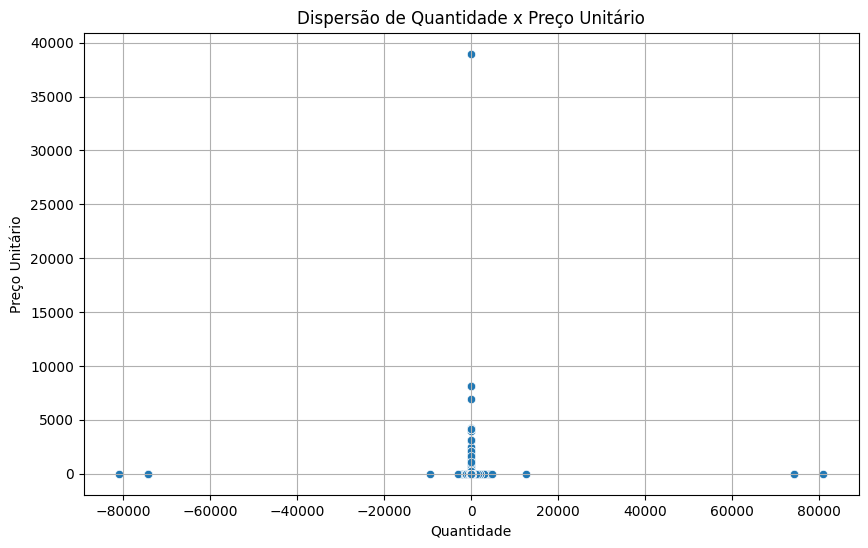

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar os outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=data)
plt.title('Dispersão de Quantidade x Preço Unitário')
plt.xlabel('Quantidade')
plt.ylabel('Preço Unitário')
plt.grid(True)
plt.show()

# Remover os outliers
data = data[(data['Quantity'] <= 10000) & (data['UnitPrice'] <= 5000)]


**8 - Crie uma coluna adicional **

In [ ]:
# Criar uma coluna adicional com o preço total da compra
data.loc[:, 'TotalPrice'] = data['Quantity'] * data['UnitPrice']


**9 - Última data**

In [ ]:
# Calcular a data da última compra no dataset
ultima_compra = data['InvoiceDate'].max()

print("Data da última compra no dataset:", ultima_compra)


Data da última compra no dataset: 2011-12-10 17:19:00


*10 - Plotando gráficos*

**Top 10 países com maior valor em vendas**

In [ ]:
# Agrupar por país e calcular o valor total de vendas
vendas_por_pais = data.groupby('Country')['TotalPrice'].sum()

# Ordenar em ordem decrescente e pegar os top 10 países
top_10_paises = vendas_por_pais.nlargest(10)

print("Top 10 países com maior valor em vendas:")
print(top_10_paises)


Top 10 países com maior valor em vendas:
Country
United Kingdom    6746977.464
Netherlands        303642.480
EIRE               268253.790
Germany            231445.960
France             208388.050
Australia          145384.050
Spain               61748.450
Switzerland         56740.920
Belgium             42365.870
Sweden              37103.470
Name: TotalPrice, dtype: float64


**Top 10 produtos mais vendidos**

In [ ]:
# Agrupar por descrição do produto e calcular a quantidade total vendida
produtos_mais_vendidos = data.groupby('Description')['Quantity'].sum()

# Ordenar em ordem decrescente e pegar os top 10 produtos
top_10_produtos = produtos_mais_vendidos.nlargest(10)

print("\nTop 10 produtos mais vendidos:")
print(top_10_produtos)



Top 10 produtos mais vendidos:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54322
JUMBO BAG RED RETROSPOT               46764
WHITE HANGING HEART T-LIGHT HOLDER    38835
ASSORTED COLOUR BIRD ORNAMENT         36285
PACK OF 72 RETROSPOT CAKE CASES       35759
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                26960
PACK OF 12 LONDON TISSUES             26951
PACK OF 60 PINK PAISLEY CAKE CASES    24990
Name: Quantity, dtype: int64


**Valor de venda total por mês**

In [ ]:
# Extrair o mês da data da fatura
data['Month'] = data['InvoiceDate'].dt.month

# Calcular o valor total de vendas por mês
vendas_por_mes = data.groupby('Month')['TotalPrice'].sum()

print("\nValor de venda total por mês:")
print(vendas_por_mes)



Valor de venda total por mês:
Month
1.0     281100.25
2.0     252279.92
3.0     270526.02
4.0     322321.81
5.0     375912.49
6.0     353138.76
7.0     391067.26
8.0     286675.93
9.0     130496.84
10.0    326651.14
11.0    382092.08
12.0    231663.78
Name: TotalPrice, dtype: float64


**Valor de venda total por mês e por país (considere apenas os top 10)**

In [ ]:
# Filtrar os dados apenas para os top 10 países
data_top_10_paises = data[data['Country'].isin(top_10_paises.index)]

# Agrupar por mês e país e calcular o valor total de vendas
vendas_por_mes_pais = data_top_10_paises.groupby(['Month', 'Country'])['TotalPrice'].sum()

# Resetar o índice para transformar a série em um DataFrame
vendas_por_mes_pais = vendas_por_mes_pais.reset_index()

# Reorganizar o DataFrame para que cada país seja uma coluna
vendas_por_mes_pais_pivot = vendas_por_mes_pais.pivot(index='Month', columns='Country', values='TotalPrice')

# Preencher valores NaN com 0
vendas_por_mes_pais_pivot.fillna(0, inplace=True)

print("\nValor de venda total por mês e por país (top 10 países):")
print(vendas_por_mes_pais_pivot)



Valor de venda total por mês e por país (top 10 países):
Country  Australia  Belgium      EIRE    France   Germany  Netherlands  \
Month                                                                    
1.0        3649.97   644.04  13690.18   6108.83   5007.75      5829.85   
2.0         427.24  1712.05    747.38   3673.75   3831.52      4486.91   
3.0       16933.38   970.00   3980.12   5949.88   4017.36       385.00   
4.0         325.51  2375.27   5165.43   5939.44   7245.36         0.00   
5.0       16619.47  1440.19  10601.16  13154.95   9061.61      2376.05   
6.0       14987.52  1935.01  11621.28   4467.25   6939.83      1269.13   
7.0         192.00  1889.74  10171.37   8607.70  17232.58     11649.35   
8.0         680.50   591.15   6052.31   6888.04   6441.16      3458.56   
9.0         210.90  1510.72   3166.31   7477.16   4251.73     13199.07   
10.0        163.20  1251.72  11613.75   7625.14   6025.39      9823.12   
11.0        925.00  1056.56   6753.49  13910.89  10090

**11 - Cálculo do RFM**

In [ ]:
# Agrupar os dados por cliente e número do pedido (InvoiceNo) para obter a data e o preço total do pedido
dados_cliente_pedido = data.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',                # Obter a data máxima da compra
    'TotalPrice': 'sum'                  # Obter o preço total do pedido
}).reset_index()

# Calcular a recência (R), a frequência (F) e o valor médio (M) das compras para cada cliente
recencia = ultima_compra - dados_cliente_pedido.groupby('CustomerID')['InvoiceDate'].max()
frequencia = dados_cliente_pedido.groupby('CustomerID')['InvoiceNo'].nunique()
valor_medio = dados_cliente_pedido.groupby('CustomerID')['TotalPrice'].mean().abs()  # Usar abs() para garantir que o valor médio seja positivo

# Juntar as métricas de RFM em um DataFrame
rfm = pd.concat([recencia, frequencia, valor_medio], axis=1)
rfm.columns = ['Recencia', 'Frequencia', 'ValorMedio']

print("RFM (Recência, Frequência, Valor Médio) para cada cliente:")
print(rfm)



RFM (Recência, Frequência, Valor Médio) para cada cliente:
                    Recencia  Frequencia     ValorMedio
CustomerID                                             
12346                    NaT           1  154367.200000
12347       95 days 04:18:00           7     615.714286
12348      220 days 06:32:00           4     449.310000
12349                    NaT           1    1757.550000
12350      311 days 01:18:00           1     334.400000
...                      ...         ...            ...
18280      160 days 07:27:00           1     180.600000
18281        4 days 06:26:00           1      80.820000
18282       93 days 02:09:00           3      58.866667
18283       60 days 02:12:00          16     137.708125
18287        0 days 06:56:00           3     612.426667

[4371 rows x 3 columns]


In [ ]:
# Definir o nome do arquivo Excel de saída
nome_arquivo_excel = 'rfm_clientes.xlsx'

# Salvar o DataFrame rfm em um arquivo Excel
rfm.to_excel(nome_arquivo_excel, index=True)

print("Arquivo Excel salvo com sucesso:", nome_arquivo_excel)


Arquivo Excel salvo com sucesso: rfm_clientes.xlsx
